In [1]:
# Input parameters
DATE = "10-13-2020"

TOP_K = 5

US_STATES = ["Alabama", "California", "Arizona"]

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
36,application_1590795424215_0037,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [1]:
# Parameters
DATE = "10-20-2020"
TOP_K = 6
US_STATES = ["Wisconsin", "Texas", "Nevada"]


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Install required libraries

Ref: https://aws.amazon.com/blogs/big-data/install-python-libraries-on-a-running-cluster-with-emr-notebooks/

In [1]:
sc.install_pypi_package("pandas==0.25.1")
sc.install_pypi_package("requests==2.24.0")
sc.install_pypi_package("matplotlib==3.3.0") 
sc.install_pypi_package("numpy==1.19.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/7e/ab/ea76361f9d3e732e114adcd801d2820d5319c23d0ac5482fa3b412db217e/pandas-0.25.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/45/1e/0c169c6a5381e241ba7404532c16a21d86ab872c9bed8bdcd4c423954103/requests-2.24.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bc/a9/01ffebfb562e4274b6487b4bb1ddec7ca55ec7510b22e4c51f14098443b8/chardet-3.0.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a2/38/928ddce2273eaa564f6f50de919327bf3a00f091b5baba8dfa9460f3a8a8/idna-2.10-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/56/aa/4ef5aa67a9a62505db124a5cb5262332d1d4153462eb8fd89c9fa41e5d92/urllib3-1.25.11-py2.py3-none-any.whl
  Using cached https://files.pythonho

## Load data to pandas dataframe

In [1]:
import pandas as pd
import io
import requests

file_name = '{}.csv'.format(DATE)

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/' + file_name
print("reading data from: " + url)

content=requests.get(url).content
csv = io.StringIO(content.decode('utf-8'))

pandas_df=pd.read_csv(csv)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

reading data from: https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/10-20-2020.csv

## Sort values by confirmed cases and filter top k States

In [1]:
pandas_df.sort_values(by=['Confirmed'], inplace=True, ascending=False)
filtered_df = pandas_df.head(TOP_K)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Plot the graph: Top `k` US States with confirmed covid-19 cases.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

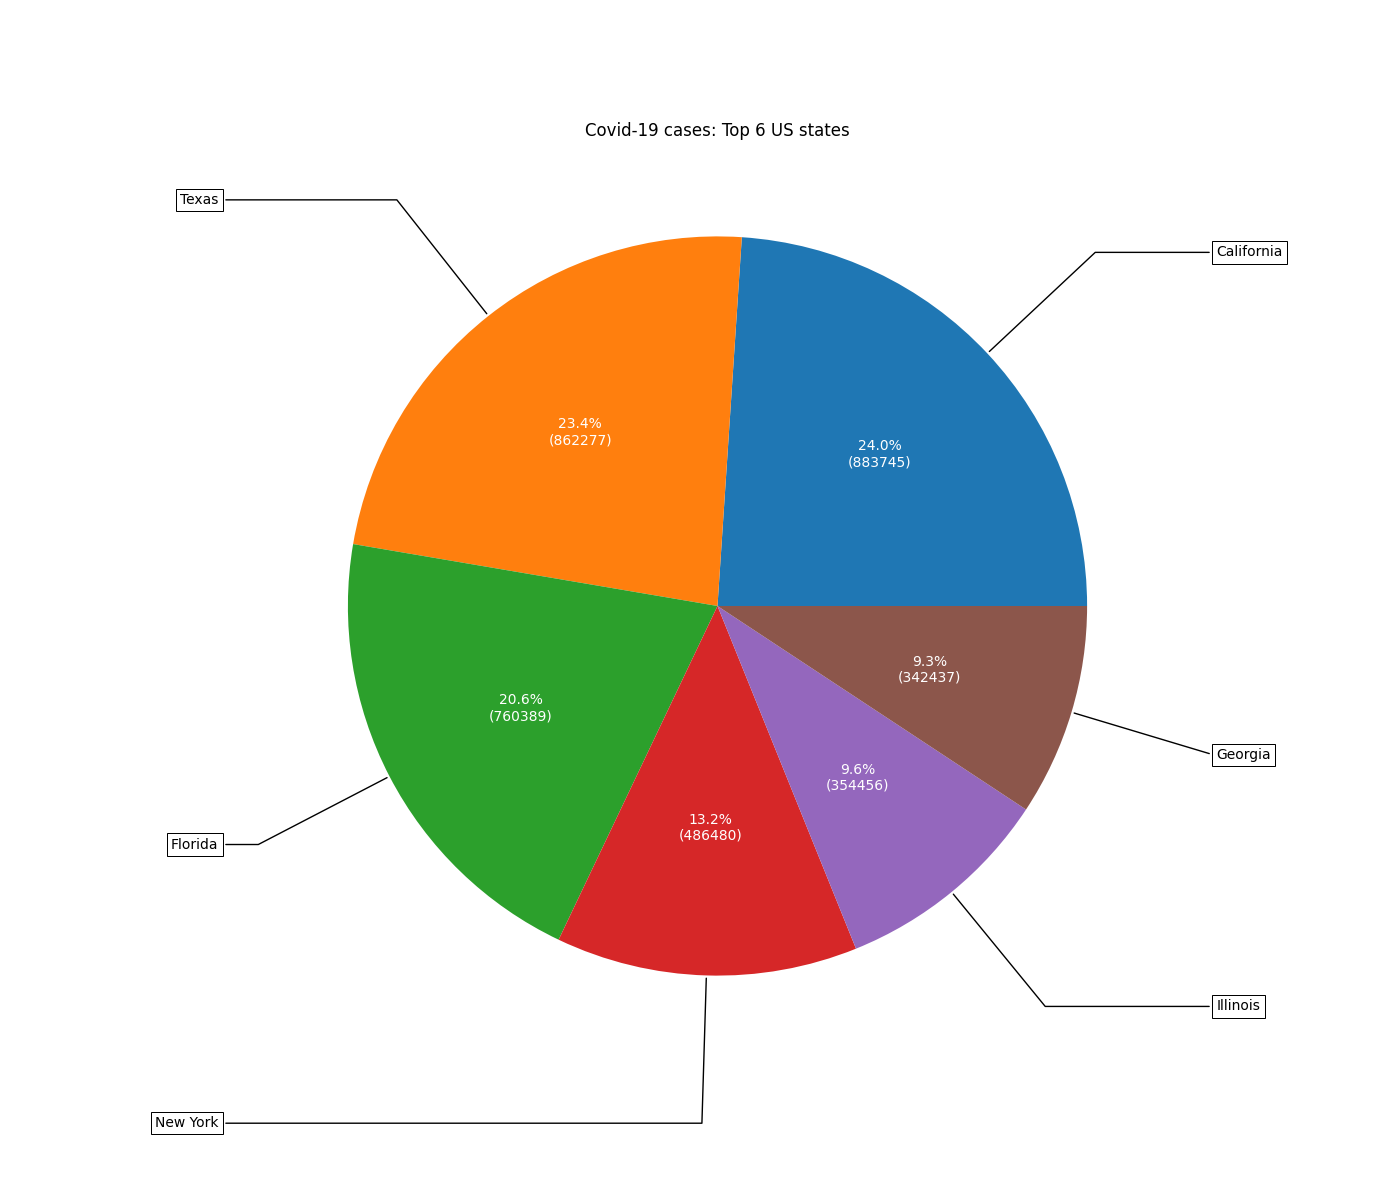

In [1]:
import matplotlib.pyplot as plt
import numpy as np

cases = filtered_df['Confirmed']
states = filtered_df['Province_State'].values


fig, ax = plt.subplots(figsize=(14, 12), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(cases, autopct=lambda pct: func(pct, cases), textprops=dict(color="w"))

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(states[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Covid-19 cases: Top {} US states".format(TOP_K))

%matplot plt

## Plot the graph: Mortality rate among covid patients in specific US States.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

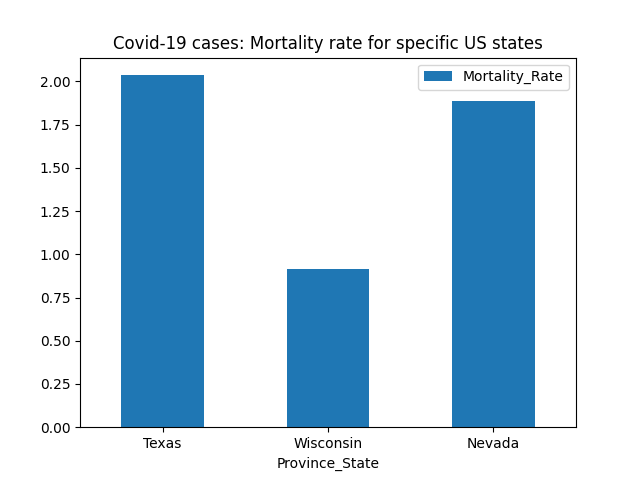

In [1]:
filtered_df = pandas_df.loc[pandas_df['Province_State'].isin(US_STATES)]

ax = filtered_df.plot.bar(x='Province_State', y='Mortality_Rate', rot=0)
ax.set_title("Covid-19 cases: Mortality rate for specific US states")
%matplot plt